# Week 10 Lab: Replicate Effectively Using Matplotlib Tutorial

### Description
Go through the tutorial at [pbpython.com/effective-matplotlib.html](https://pbpython.com/effective-matplotlib.html) and replicate the code given in the tutorial in your local system.

## Getting Started
To get started, I am going to setup the imports and read in some data.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

In [4]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


The data consists of sales transactions for 2014. I’m going to summarize the data so we can see the total number of purchases and total sales for the top 10 customers. I am also going to rename columns for clarity during plots.

In [5]:
top_10 = (df.groupby('name')[['ext price', 'quantity']].agg({'ext price': 'sum', 'quantity': 'count'}).sort_values(by='ext price', ascending=False).head(10).reset_index())
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

top_10.head(10)

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


matplotlib has many different styles available for rendering plots. You can see which ones are available on your system using `plt.style.available` .

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [7]:
# Using a style is as simple as:
plt.style.use('ggplot')

Now that we have a nicer style in place, the first step is to plot the data using the standard pandas plotting function:

<Axes: ylabel='Name'>

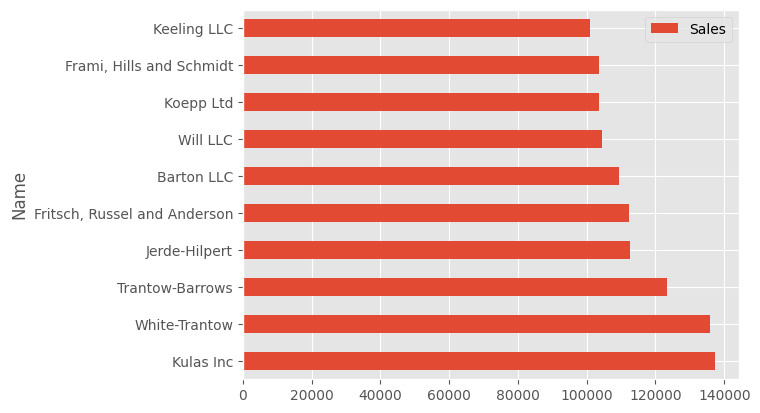

In [8]:
top_10.plot(kind='barh', y="Sales", x="Name")

## Customizing the Plot
Some of the customizations (like adding titles and labels) are very simple to use with the pandas `plot` function. However, you will probably find yourself needing to move outside of that functionality at some point. That’s why I recommend getting in the habit of doing this code below. The resulting plot looks exactly the same as the original but we added an additional call to `plt.subplots()` and passed the `ax` to the plotting function. Any future customization will be done via the `ax` or `fig` objects. Now that we have the axes in the `ax` variable, we have a lot of control:

Text(0, 0.5, 'Customer')

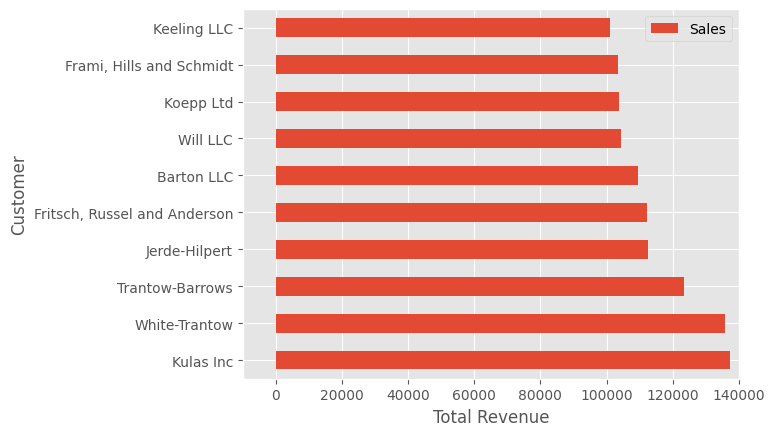

In [9]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')

Here’s another shortcut we can use to change the title and both labels:

[Text(0.5, 1.0, '2014 Revenue'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Customer')]

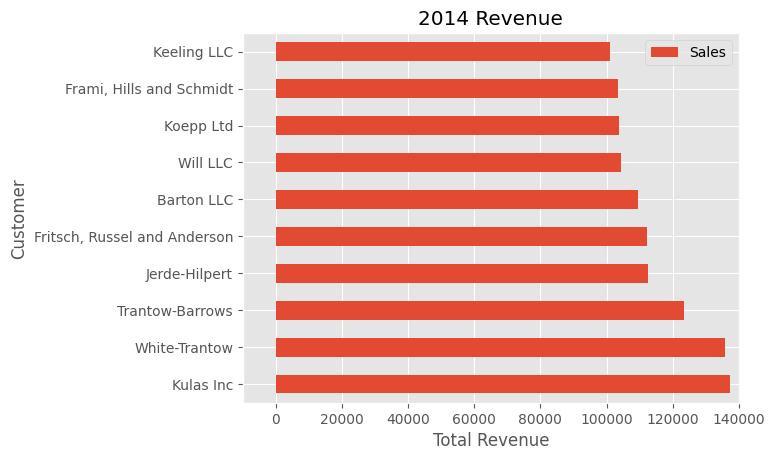

In [10]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

To further demonstrate this approach, we can also adjust the size of this image. By using the `plt.subplots()` function, we can define the `figsize` in inches. We can also remove the legend using `ax.legend().set_visible(False)`

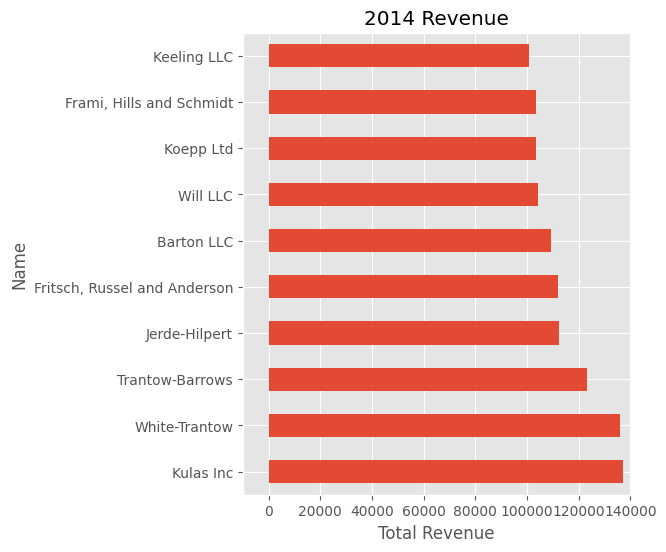

In [11]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
ax.legend().set_visible(False)

There are plenty of things you probably want to do to clean up this plot. One of the biggest eye sores is the formatting of the Total Revenue numbers. Matplotlib can help us with this through the use of the `FuncFormatter` . This versatile function can apply a user defined function to a value and return a nicely formatted string to place on the axis.

Here is a currency formatting function to gracefully handle US dollars in the several hundred thousand dollar range:

In [12]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

Now that we have a formatter function, we need to define it and apply it to the x axis. Here is the full code:

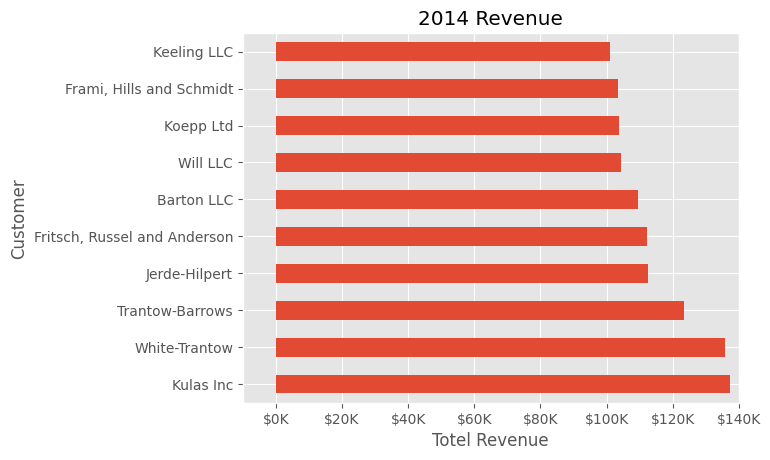

In [13]:
fig, ax = plt.subplots()
top_10.plot(kind="barh", y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Totel Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

The final customization feature I will go through is the ability to add annotations to the plot. In order to draw a vertical line, you can use `ax.axvline()` and to add custom text, you can use `ax.text()` .

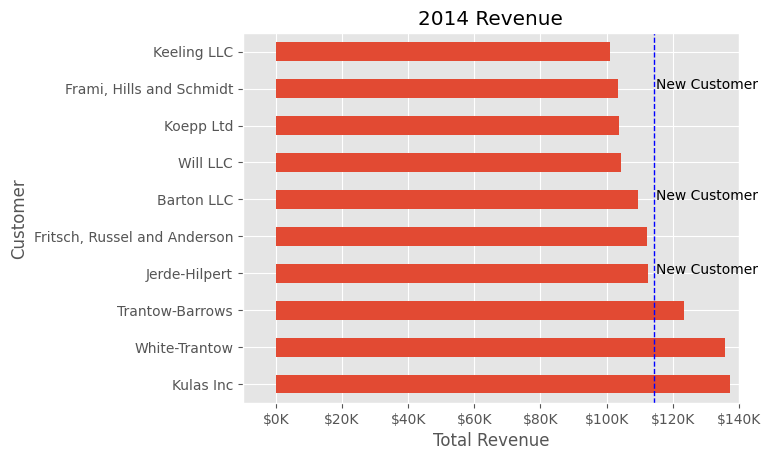

In [14]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

## Figures and Plots
If we decided that we wanted to put two plots on the same figure, we should have a basic understanding of how to do it. First, create the figure, then the axes, then plot it all together. We can accomplish this using `plt.subplots()` :
```python
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))
```
In this example, I’m using `nrows` and `ncols` to specify the size.
I am also using `sharey=True` so that the yaxis will share the same labels.

This example is also kind of nifty because the various axes get unpacked to `ax0` and `ax1` . Now that we have these axes, you can plot them like the examples above but put one plot on `ax0` and the other on `ax1` .

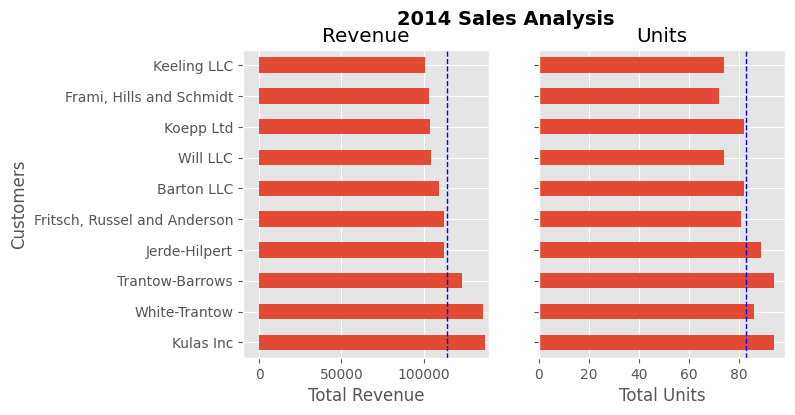

In [15]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

Matplotlib supports many different formats for saving files. You can use `fig.canvas.get_supported_filetypes()` to see what your system supports:

In [16]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

Since we have the `fig` object, we can save the figure using multiple options:

In [17]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

This version saves the plot as a png with opaque background. I have also specified the dpi and `bbox_inches="tight"` in order to minimize excess white space.